# Building a Euribor Dual Curve and Valuing a Swap - Bloomberg Example

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
#  FINANCEPY BETA Version 0.350 - This build: 30 Apr 2024 at 21:20 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [3]:
value_dt = Date(26, 10, 2020)

In [4]:
value_dt.add_weekdays(2).add_tenor("1D")

29-OCT-2020

In [5]:
interp_type = InterpTypes.LINEAR_ZERO_RATES

## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [6]:
cal = CalendarTypes.TARGET

depoDCCType = DayCountTypes.ACT_360
depos = []

spot_days = 2
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "1D", -0.46800/100.0, depoDCCType, cal_type = cal); depos.append(depo)

fras = []

swaps = []
swap_type = SwapTypes.PAY
spot_days = 2
settle_dt = value_dt.add_weekdays(spot_days)
fixed_dcc_type = DayCountTypes.ACT_360
fixed_freq_type = FrequencyTypes.ANNUAL
lag = 1 # days

# Standard OIS with standard annual terms
swap = OIS(settle_dt, "1W", swap_type, -0.47000/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "2W", swap_type, -0.47150/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "1M", swap_type, -0.47300/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "2M", swap_type, -0.47700/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "3M", swap_type, -0.48150/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "4M", swap_type, -0.48500/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "5M", swap_type, -0.48900/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "6M", swap_type, -0.49300/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "7M", swap_type, -0.49700/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "8M", swap_type, -0.50065/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "9M", swap_type, -0.50375/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "10M", swap_type, -0.50790/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "11M", swap_type, -0.51100/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "12M", swap_type, -0.51400/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "18M", swap_type, -0.53250/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "2Y", swap_type, -0.54300/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "30M", swap_type, -0.54850/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "3Y", swap_type, -0.54900/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "4Y", swap_type, -0.53700/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "5Y", swap_type, -0.51350/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "6Y", swap_type, -0.48300/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)

swap = OIS(settle_dt, "7Y", swap_type, -0.44650/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "8Y", swap_type, -0.40480/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "9Y", swap_type, -0.36220/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "10Y", swap_type, -0.31550/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "11Y", swap_type, -0.27100/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "12Y", swap_type, -0.22850/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "15Y", swap_type, -0.12300/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "20Y", swap_type, -0.04000/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "25Y", swap_type, -0.03450/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "30Y", swap_type, -0.05750/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "35Y", swap_type, -0.08160/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "40Y", swap_type, -0.10485/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)
swap = OIS(settle_dt, "50Y", swap_type, -0.14300/100.0, fixed_freq_type, fixed_dcc_type, cal_type = cal, payment_lag=lag); swaps.append(swap)

ois_depos = depos.copy()
ois_fras = fras.copy()
ois_swaps = swaps.copy()

In [7]:
ois_curve = OISCurve(value_dt, ois_depos, ois_fras, ois_swaps, interp_type)

Inserting synthetic deposit


In [8]:
df_start = ois_curve.df(settle_dt)

print("df_start:", df_start)

for depo in ois_depos:
    start = depo.start_dt
    maturity_dt = depo.maturity_dt
    df = ois_curve.df(maturity_dt) / df_start
    days = maturity_dt - settle_dt
    ccZeroRate = ois_curve.zero_rate(maturity_dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_365F)
    print("%12s  %12s  %12s %5.0f  %12.9f  %9.6f"% (start, maturity_dt, maturity_dt, days, df, ccZeroRate*100))

for swap in ois_swaps:
    start = swap.effective_dt
    maturity_dt = swap.fixed_leg.maturity_dt
    payment_dt = swap.fixed_leg.payment_dts[-1]
    df = ois_curve.df(payment_dt) / df_start
    days = maturity_dt - settle_dt
    ccZeroRate = ois_curve.zero_rate(payment_dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_365F)
    print("%12s  %12s  %12s %5.0f  %12.9f  %9.6f"% (start, maturity_dt, payment_dt, days, df, ccZeroRate*100))

df_start: 1.000025929634998
 26-OCT-2020   28-OCT-2020   28-OCT-2020     0   1.000000000  -0.473210
 28-OCT-2020   29-OCT-2020   29-OCT-2020     1   1.000012894  -0.472354
 28-OCT-2020   04-NOV-2020   05-NOV-2020     7   1.000104593  -0.476385
 28-OCT-2020   11-NOV-2020   12-NOV-2020    14   1.000196563  -0.477663
 28-OCT-2020   30-NOV-2020   01-DEC-2020    33   1.000446999  -0.479395
 28-OCT-2020   28-DEC-2020   29-DEC-2020    61   1.000822427  -0.483635
 28-OCT-2020   28-JAN-2021   29-JAN-2021    92   1.001245793  -0.488311
 28-OCT-2020   01-MAR-2021   02-MAR-2021   124   1.001687239  -0.491959
 28-OCT-2020   29-MAR-2021   30-MAR-2021   152   1.002083191  -0.496154
 28-OCT-2020   28-APR-2021   29-APR-2021   182   1.002513056  -0.500313
 28-OCT-2020   28-MAY-2021   31-MAY-2021   212   1.002979428  -0.504764
 28-OCT-2020   28-JUN-2021   29-JUN-2021   243   1.003405638  -0.508297
 28-OCT-2020   28-JUL-2021   29-JUL-2021   273   1.003849642  -0.511553
 28-OCT-2020   30-AUG-2021   31-AUG-

## Value an OIS Contract

In [9]:
fixed_cpn = -0.51350/100 # CHANGED
start_dt = settle_dt
maturity_dt = Date(28, 10, 2025,)
fixed_dcc_type = DayCountTypes.ACT_360
fixed_freq_type = FrequencyTypes.ANNUAL
float_dcc_type = DayCountTypes.ACT_360
float_freq_type = FrequencyTypes.ANNUAL
notional = 10 * ONE_MILLION

In [10]:
ois_swap = OIS(start_dt, maturity_dt, SwapTypes.RECEIVE, 
               fixed_cpn, fixed_freq_type, fixed_dcc_type, 
               notional, lag, 
               0.0, float_freq_type, float_dcc_type)

In [11]:
ois_swap.value(settle_dt, ois_curve)

3820.995180254162

In [12]:
ois_curve.df(Date(29,10,2021)) / ois_curve.df(Date(28,10,2020))

1.0052541416625074

In [13]:
ois_swap.print_fixed_leg_pv()

START DATE: 28-OCT-2020
MATURITY DATE: 28-OCT-2025
COUPON (%): -0.5135
FREQUENCY: FrequencyTypes.ANNUAL
DAY COUNT: DayCountTypes.ACT_360

PAYMENTS VALUATION:
+---------+-------------+----------+---------+-----------+--------+-----------+------------+
| PAY_NUM |    PAY_dt   | NOTIONAL |   RATE  |    PMNT   |   DF   |     PV    |   CUM_PV   |
+---------+-------------+----------+---------+-----------+--------+-----------+------------+
|    1    | 29-OCT-2021 | 10000000 | -0.5135 | -52063.19 | 1.0053 | -52336.74 | -52336.74  |
|    2    | 31-OCT-2022 | 10000000 | -0.5135 | -52063.19 | 1.0112 | -52643.71 | -104980.45 |
|    3    | 31-OCT-2023 | 10000000 | -0.5135 | -52348.47 | 1.0169 | -53234.76 | -158215.21 |
|    4    | 29-OCT-2024 | 10000000 | -0.5135 | -51920.56 | 1.0221 | -53068.45 | -211283.66 |
|    5    | 29-OCT-2025 | 10000000 | -0.5135 | -52063.19 | 1.0265 |  -53442.0 | -264725.67 |
+---------+-------------+----------+---------+-----------+--------+-----------+------------+


In [14]:
ois_swap.print_float_leg_pv()

START DATE: 28-OCT-2020
MATURITY DATE: 28-OCT-2025
SPREAD (BPS): 0.0
FREQUENCY: FrequencyTypes.ANNUAL
DAY COUNT: DayCountTypes.ACT_360

PAYMENTS VALUATION:
+---------+-------------+----------+---------+-----------+--------+-----------+------------+
| PAY_NUM |    PAY_dt   | NOTIONAL |   IBOR  |    PMNT   |   DF   |     PV    |   CUM_PV   |
+---------+-------------+----------+---------+-----------+--------+-----------+------------+
|    1    | 29-OCT-2021 | 10000000 | -0.5211 | -52837.69 | 1.0053 | -53115.31 | -53115.31  |
|    2    | 31-OCT-2022 | 10000000 | -0.5798 | -58782.54 | 1.0112 | -59437.98 | -112553.29 |
|    3    | 31-OCT-2023 | 10000000 | -0.5686 | -57963.42 | 1.0169 | -58944.77 | -171498.06 |
|    4    | 29-OCT-2024 | 10000000 | -0.5096 | -51528.68 | 1.0221 | -52667.91 | -224165.97 |
|    5    | 29-OCT-2025 | 10000000 | -0.4264 | -43235.67 | 1.0265 | -44380.69 | -268546.66 |
+---------+-------------+----------+---------+-----------+--------+-----------+------------+


## Building the Dual Curve

Build the Ibor Curve

In [15]:
# Need to specify a UK calendar (trade was done in London)
cal = CalendarTypes.UNITED_KINGDOM

depoDCCType = DayCountTypes.ACT_360
depos = []
spot_days = 2
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "6M", -0.496/100.0, depoDCCType, cal_type=cal); depos.append(depo)

fraDCCType = DayCountTypes.ACT_360

fras = []
fra = IborFRA(settle_dt.add_tenor("1M"), "6M", -0.493/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("2M"), "6M", -0.491/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("3M"), "6M", -0.494/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("4M"), "6M", -0.496/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("5M"), "6M", -0.499/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("6M"), "6M", -0.501/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("7M"), "6M", -0.505/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("8M"), "6M", -0.508/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("9M"), "6M", -0.518/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("10M"), "6M", -0.516/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("11M"), "6M", -0.518/100.0, fraDCCType, cal_type=cal); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("12M"), "6M", -0.519/100.0, fraDCCType, cal_type=cal); fras.append(fra)

swaps = []
swap_type = SwapTypes.PAY
fixed_dcc_type = DayCountTypes.THIRTY_E_360_ISDA
fixed_freq_type = FrequencyTypes.ANNUAL

swap = IborSwap(settle_dt, "2Y", swap_type, -0.51375/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "3Y", swap_type, -0.50600/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "4Y", swap_type, -0.48225/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "5Y", swap_type, -0.45100/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "6Y", swap_type, -0.41500/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "7Y", swap_type, -0.37530/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "8Y", swap_type, -0.33250/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "9Y", swap_type, -0.28810/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "10Y", swap_type, -0.24180/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "11Y", swap_type, -0.198/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "12Y", swap_type, -0.156/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "15Y", swap_type, -0.05375/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "20Y", swap_type, 0.02325/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "25Y", swap_type, 0.02300/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "30Y", swap_type, -0.00510/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "40Y", swap_type, -0.0627/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)
swap = IborSwap(settle_dt, "50Y", swap_type, -0.1125/100.0, fixed_freq_type, fixed_dcc_type, cal_type=cal); swaps.append(swap)

ibor_depos = depos.copy()
ibor_fras = fras.copy()
ibor_swaps = swaps.copy()

In [16]:
ibor_single_curve = IborSingleCurve(value_dt, ibor_depos, ibor_fras, ibor_swaps, interp_type)

In [17]:
ibor_dual_curve = IborDualCurve(value_dt, ois_curve, ibor_depos, ibor_fras, ibor_swaps, interp_type)

In [18]:
for swap in ibor_swaps:
    dt = swap.maturity_dt
    df = ibor_dual_curve.df(dt) / ibor_dual_curve.df(settle_dt)
    ccZeroRate = ibor_dual_curve.zero_rate(dt, FrequencyTypes.CONTINUOUS, DayCountTypes.ACT_365F)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

 28-OCT-2022  1.010356065 -0.515103
 30-OCT-2023  1.015367780 -0.507425
 28-OCT-2024  1.019538903 -0.483455
 28-OCT-2025  1.022890604 -0.452457
 28-OCT-2026  1.025325449 -0.416722
 28-OCT-2027  1.026766245 -0.377297
 30-OCT-2028  1.027162116 -0.334653
 29-OCT-2029  1.026503503 -0.290512
 28-OCT-2030  1.024741007 -0.244406
 28-OCT-2031  1.022315417 -0.200687
 28-OCT-2032  1.019211921 -0.158629
 29-OCT-2035  1.008391057 -0.055829
 29-OCT-2040  0.995528324  0.022247
 30-OCT-2045  0.994433831  0.022193
 28-OCT-2050  1.001741435 -0.005886
 28-OCT-2060  1.025398741 -0.062721
 28-OCT-2070  1.057125805 -0.111077


## Swap Valuation

In [19]:
fixed_cpn = -0.4510/100.0
start_dt = settle_dt
maturity_dt = Date(28, 10, 2025)
fixed_dcc_type = DayCountTypes.THIRTY_E_360_ISDA
fixed_freq_type = FrequencyTypes.ANNUAL
float_dcc_type = DayCountTypes.ACT_360
float_freq_type = FrequencyTypes.SEMI_ANNUAL
notional = 10 * ONE_MILLION

In [20]:
ibor_swap = IborSwap(start_dt, maturity_dt, SwapTypes.RECEIVE, 
                    fixed_cpn, fixed_freq_type, fixed_dcc_type, 
                    notional, 
                    0.0, float_freq_type, float_dcc_type)

In [21]:
ibor_swap.value(settle_dt, ibor_single_curve)

3290.21337096786

In [22]:
ibor_swap.value(settle_dt, ois_curve, ibor_dual_curve)

3316.9930925787194

In [23]:
ibor_swap.print_fixed_leg_pv()

START DATE: 28-OCT-2020
MATURITY DATE: 28-OCT-2025
COUPON (%): -0.451
FREQUENCY: FrequencyTypes.ANNUAL
DAY COUNT: DayCountTypes.THIRTY_E_360_ISDA

PAYMENTS VALUATION:
+---------+-------------+----------+--------+-----------+--------+-----------+------------+
| PAY_NUM |    PAY_dt   | NOTIONAL |  RATE  |    PMNT   |   DF   |     PV    |   CUM_PV   |
+---------+-------------+----------+--------+-----------+--------+-----------+------------+
|    1    | 28-OCT-2021 | 10000000 | -0.451 |  -45100.0 | 1.0052 | -45336.26 | -45336.26  |
|    2    | 28-OCT-2022 | 10000000 | -0.451 |  -45100.0 | 1.0111 | -45600.65 | -90936.91  |
|    3    | 30-OCT-2023 | 10000000 | -0.451 | -45350.56 | 1.0169 | -46117.65 | -137054.56 |
|    4    | 28-OCT-2024 | 10000000 | -0.451 | -44849.44 | 1.0221 | -45840.38 | -182894.95 |
|    5    | 28-OCT-2025 | 10000000 | -0.451 |  -45100.0 | 1.0265 | -46293.89 | -229188.83 |
+---------+-------------+----------+--------+-----------+--------+-----------+------------+


In [24]:
ibor_swap.print_float_leg_pv()

START DATE: 28-OCT-2020
MATURITY DATE: 28-OCT-2025
SPREAD (BPS): 0.0
FREQUENCY: FrequencyTypes.SEMI_ANNUAL
DAY COUNT: DayCountTypes.ACT_360

PAYMENTS VALUATION:
+---------+-------------+----------+---------+-----------+--------+-----------+------------+
| PAY_NUM |    PAY_dt   | NOTIONAL |   IBOR  |    PMNT   |   DF   |     PV    |   CUM_PV   |
+---------+-------------+----------+---------+-----------+--------+-----------+------------+
|    1    | 28-APR-2021 | 10000000 |  -0.501 | -25328.67 | 1.0025 | -25391.96 | -25391.96  |
|    2    | 28-OCT-2021 | 10000000 | -0.5093 | -25891.96 | 1.0052 |  -26027.6 | -51419.56  |
|    3    | 28-APR-2022 | 10000000 | -0.5248 | -26529.87 | 1.0081 | -26745.87 | -78165.43  |
|    4    | 28-OCT-2022 | 10000000 | -0.5228 | -26574.95 | 1.0111 | -26869.95 | -105035.38 |
|    5    | 28-APR-2023 | 10000000 |  -0.494 | -24976.96 | 1.014  | -25327.27 | -130362.65 |
|    6    | 30-OCT-2023 | 10000000 | -0.4889 | -25124.61 | 1.0169 | -25549.59 | -155912.24 |
| 

## Dual Curve

Look at short end

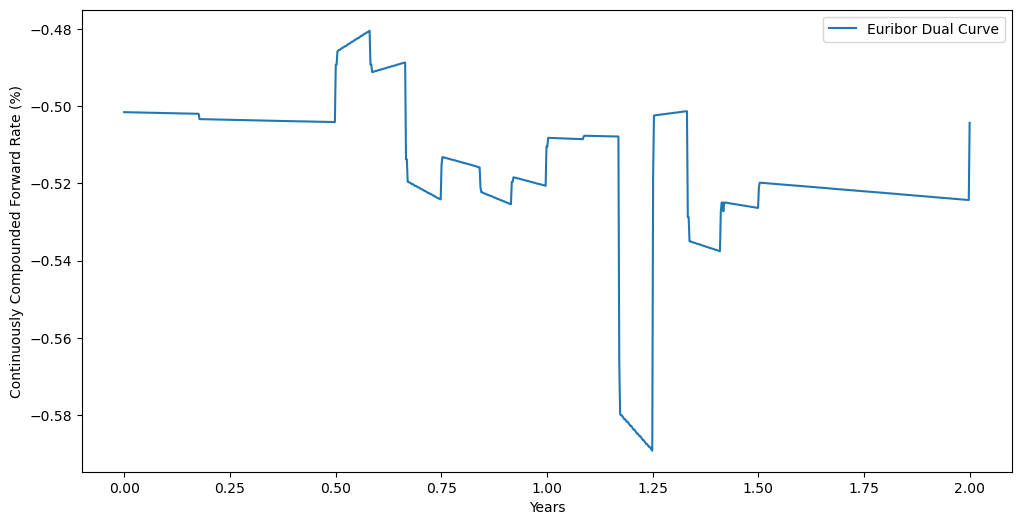

In [25]:
years = np.linspace(0, 2, 1000)
dates = settle_dt.add_years(years)
ibor_dual_curve_fwds = ibor_dual_curve.fwd(dates)
plt.figure(figsize=(12,6))
plt.plot(years, ibor_dual_curve_fwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Continuously Compounded Forward Rate (%)")
plt.legend();

Look at long end

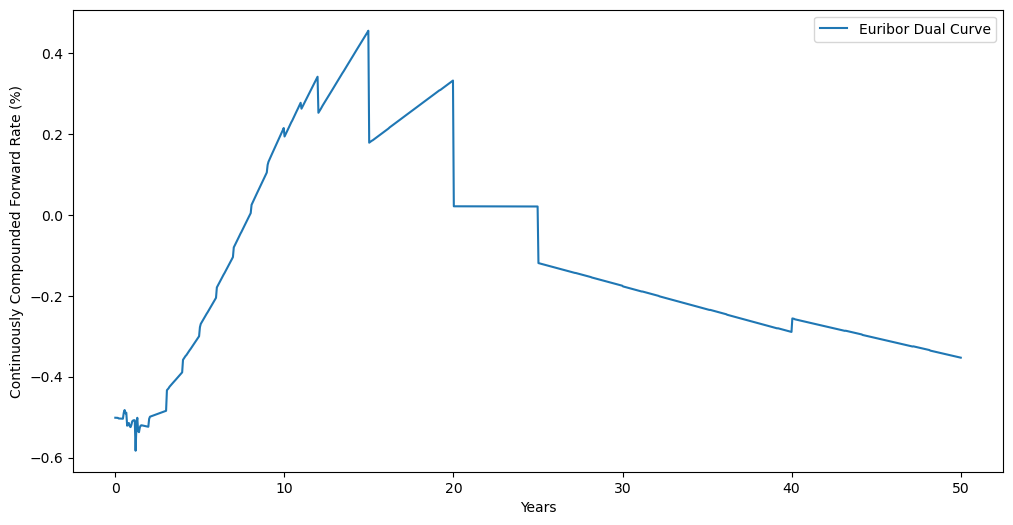

In [26]:
years = np.linspace(0, 50, 1000)
dates = settle_dt.add_years(years)
ibor_dual_curve_fwds = ibor_dual_curve.fwd(dates)
plt.figure(figsize=(12,6))
plt.plot(years, ibor_dual_curve_fwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Continuously Compounded Forward Rate (%)")
plt.legend();

Copyright (c) Dominic O'Kane 2020